# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Loading

In [2]:
file_path = "/kaggle/input/imdb-india-movies/IMDb Movies India.csv"
df = pd.read_csv(file_path,encoding='ISO-8859-1')

# Exploratory Data Analysis

In [3]:
# Display first few rows
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
df.shape

(15509, 10)

In [5]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
df.shape

(5659, 10)

In [12]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
#Convert into correct data types
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [14]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


**Data distribution and visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


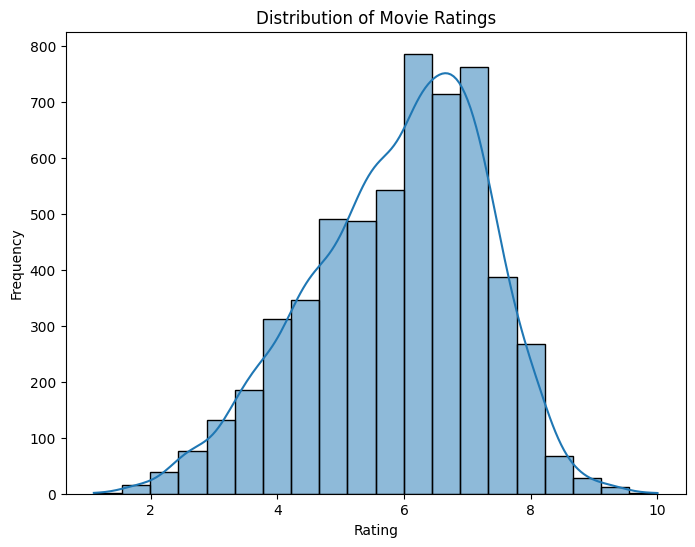

In [16]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


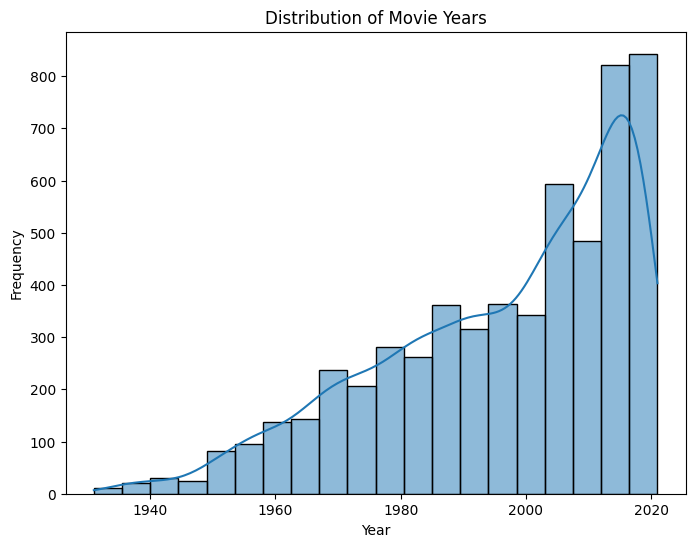

In [17]:
# Distribution of Movie Years
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title("Distribution of Movie Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


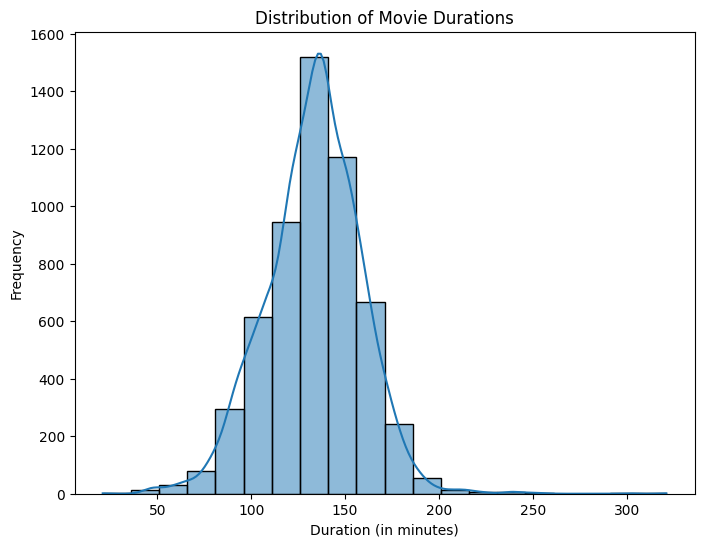

In [18]:
# Distribution of Movie Durations
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (in minutes)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


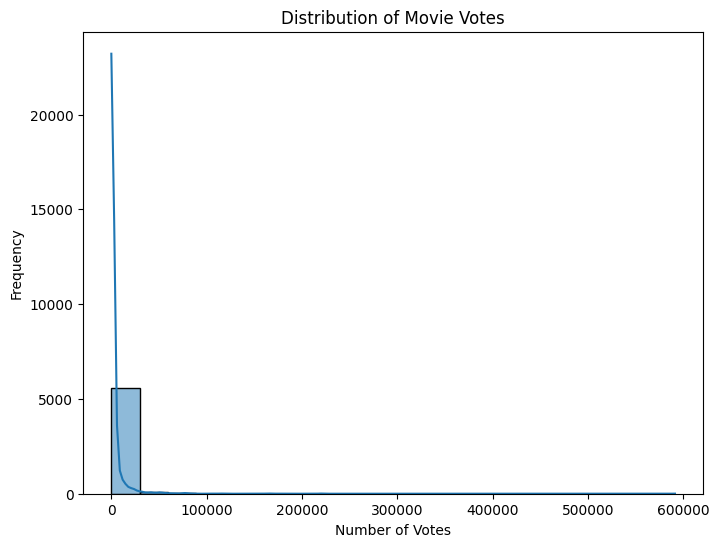

In [19]:
# Distribution of Votes
plt.figure(figsize=(8, 6))
sns.histplot(df['Votes'], bins=20, kde=True)
plt.title("Distribution of Movie Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Drop irrelevant columns
df.drop(columns=["ID", "Name"], errors="ignore", inplace=True) 

# Data Processing

In [21]:
# Data Cleaning: Handle missing and incorrect values
df["Duration"] = df["Duration"].astype(str).str.extract(r"(\d+)") 
df["Duration"] = pd.to_numeric(df["Duration"], errors="coerce")
df["Duration"].fillna(df["Duration"].median(), inplace=True)

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].fillna(df["Year"].median(), inplace=True)

df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df["Votes"].fillna(df["Votes"].median(), inplace=True)

<ipython-input-21-7a0512838eb1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Duration"].fillna(df["Duration"].median(), inplace=True)
<ipython-input-21-7a0512838eb1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [22]:
# Encode categorical features
label_encoders = {}
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert to string to avoid errors
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [23]:
# Define target variable and features
X = df.drop(columns=["Rating"])  # Features
y = pd.to_numeric(df["Rating"], errors="coerce")  # Ensure target variable is numeric
y.fillna(y.median(), inplace=True)  # Fill missing ratings with median

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Check for NaN and Inf values in X_test and y_test
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())
print("Inf values in X_test:", np.isinf(X_test).sum())
print("Inf values in y_test:", np.isinf(y_test).sum())

NaN values in X_test: 0
NaN values in y_test: 0
Inf values in X_test: 0
Inf values in y_test: 0


In [27]:
# Ensure no NaN or Inf values in the data
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [28]:
# Drop any remaining NaN rows in X_test
mask = np.isnan(X_test).any(axis=1)
X_test = X_test[~mask]
y_test = y_test[~mask]

In [29]:
print("Final X_test NaN count:", np.isnan(X_test).sum())

Final X_test NaN count: 0


# Modeling

In [30]:
# Build Neural Network Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Linear activation for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.1251 - mae: 2.8165 - val_loss: 2.4534 - val_mae: 1.2346
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6582 - mae: 1.2557 - val_loss: 2.1050 - val_mae: 1.1366
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2399 - mae: 1.1375 - val_loss: 1.8950 - val_mae: 1.0976
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9049 - mae: 1.0885 - val_loss: 1.7791 - val_mae: 1.0666
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7746 - mae: 1.0490 - val_loss: 1.7037 - val_mae: 1.0353
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6243 - mae: 0.9967 - val_loss: 1.5990 - val_mae: 0.9990
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5829 - mae: 0.9850 - val_loss: 1.5631 - val_mae: 0.9812
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5355 - mae: 0.9613 - val_loss: 1.5411 - val_mae: 0.9853
Epoch 9/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

In [32]:
# Predictions
y_pred = model.predict(X_test).flatten()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

MAE: 0.93, MSE: 1.46, RMSE: 1.21, R² Score: 0.21


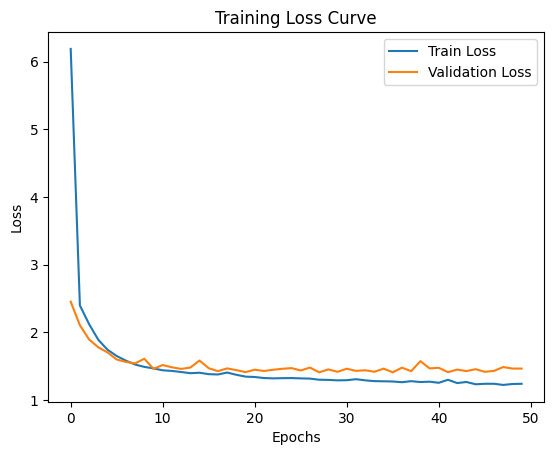

In [34]:
# Visualization - Loss Curve
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()

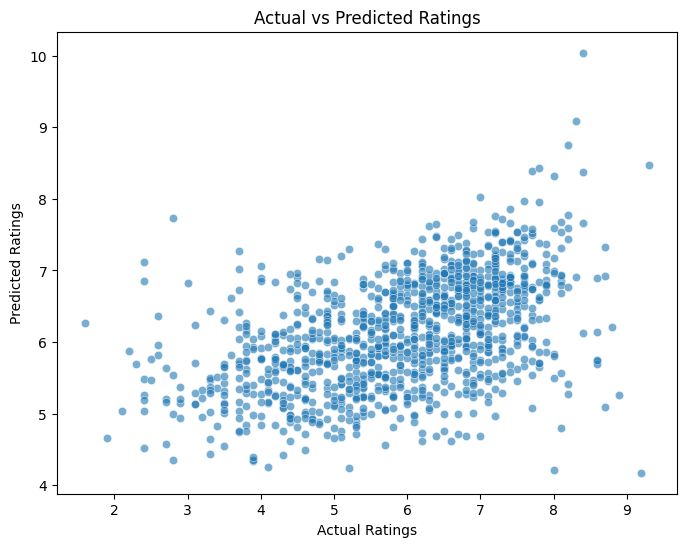

In [35]:
# Scatter Plot: Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


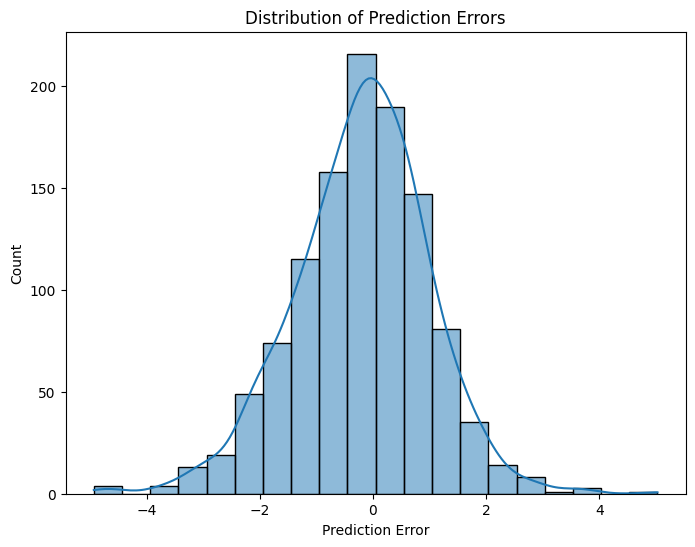

In [36]:
# Histogram of Errors
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()

In [37]:
# Define an acceptable threshold for accuracy (e.g., ±0.5)
threshold = 0.5
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold)

print(f"Accuracy (within ±{threshold}): {accuracy * 100:.2f}%")

Accuracy (within ±0.5): 36.93%


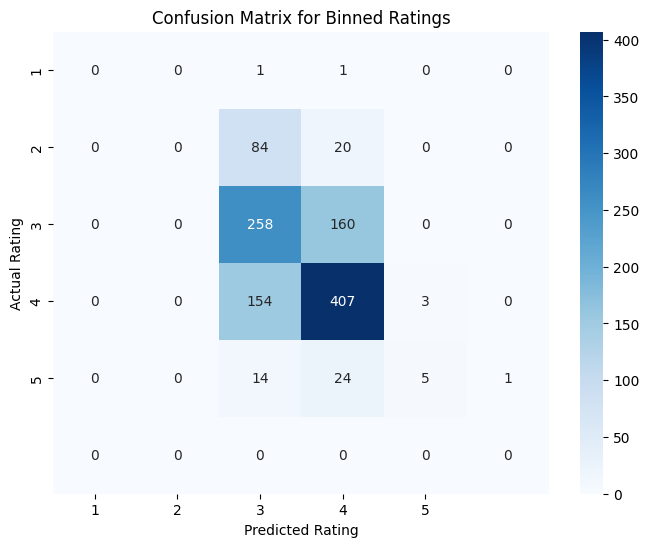

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define rating bins
bins = [0, 2, 4, 6, 8, 10]
labels = [1, 2, 3, 4, 5]  # Label for each bin

# Discretize the actual and predicted ratings
y_test_binned = np.digitize(y_test, bins)  
y_pred_binned = np.digitize(y_pred.flatten(), bins)  

# Generate confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Confusion Matrix for Binned Ratings")
plt.show()

# Predict with test data

In [39]:
import numpy as np
import pandas as pd

# Example input data (replace with actual values)
input_data = {
    "Genre": ["Action"],
    "Director": ["John Doe"], 
    "Actor 1": ["Actor A"],
    "Actor 2": ["Actor B"],
    "Actor 3": ["Actor C"],
    "Year": [2020],
    "Duration": [120],
    "Votes": [150000]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Save the column names (feature order) during training
feature_columns = X.columns  

# Ensure the input data has the same column order as the training data
input_df = input_df[feature_columns] 

# Function to handle unseen labels
def encode_with_unseen_handling(input_series, label_encoders, column_name):
    """Encode categorical feature with unseen label handling."""
    if column_name in label_encoders:
        encoder = label_encoders[column_name]
        
        # Handle unseen labels by assigning the most frequent label or a default one
        try:
            return encoder.transform(input_series)
        except ValueError:
            # Fallback handling for unseen labels (assign the most frequent label, for example)
            return encoder.transform([encoder.classes_[0]] * len(input_series)) 
    else:
        raise ValueError(f"Encoder for {column_name} not found in label_encoders.")

# Encode categorical features using the same label_encoders from training
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in categorical_columns:
    input_df[col] = encode_with_unseen_handling(input_df[col], label_encoders, col)

# Scale the input features using the same scaler used for training
input_scaled = scaler.transform(input_df)

# Make the prediction with the trained model
predicted_rating = model.predict(input_scaled)

# Display the predicted rating
print(f"Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Rating: 5.53
